In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.7 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.7 MB 5.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.7 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.7 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.7 MB 5.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.7 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.7 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.7 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 4.4 MB/s  0:00:02

   ----------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\agnes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


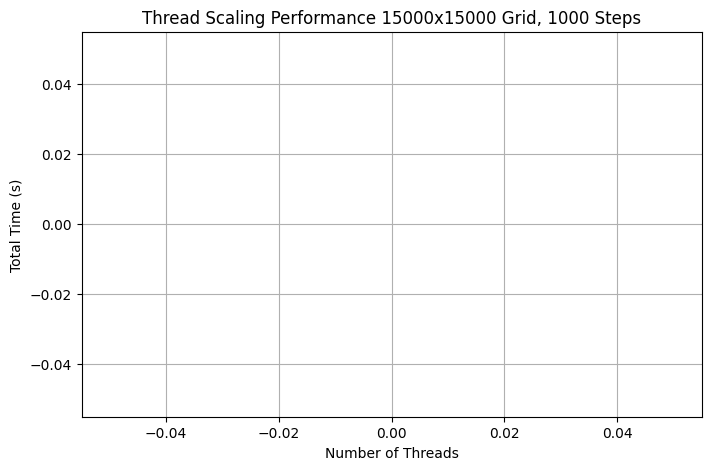

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# Pattern to match your CSV files
files = glob.glob("output/output/thread_scaling_*_threads.csv")

data = []

for f in files:
    # Extract number of threads from filename using regex
    match = re.search(r"output\\output\\thread_scaling_(\d+)_threads\.csv", f)
    if match:
        threads = int(match.group(1))
        df = pd.read_csv(f)
        total_time = df["Mean_total_time"].iloc[0]  # first row, Mean_total_time column
        data.append((threads, total_time))

# Convert to DataFrame
results = pd.DataFrame(data, columns=["Threads", "Total_time"])
results.sort_values("Threads", inplace=True)

# Plot
plt.figure(figsize=(8,5))
plt.plot(results["Threads"], results["Total_time"], marker="o")
plt.xlabel("Number of Threads")
plt.ylabel("Total Time (s)")
plt.title("Thread Scaling Performance 15000x15000 Grid, 1000 Steps")
plt.grid(True)
plt.show()

In [10]:
print(files)

['output/output\\thread_scaling_112_threads.csv', 'output/output\\thread_scaling_16_threads.csv', 'output/output\\thread_scaling_1_threads.csv', 'output/output\\thread_scaling_2_threads.csv', 'output/output\\thread_scaling_32_threads.csv', 'output/output\\thread_scaling_4_threads.csv', 'output/output\\thread_scaling_56_threads.csv', 'output/output\\thread_scaling_84_threads.csv', 'output/output\\thread_scaling_8_threads.csv']


Files found: ['C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_112_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_16_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_1_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_2_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_32_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_4_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_56_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\output_multithread\\thread_scaling_84_threads.csv', 'C:\\Users\\agnes\\Desktop\\magistrale\\hpc\\HPC_exam\\output\\outpu

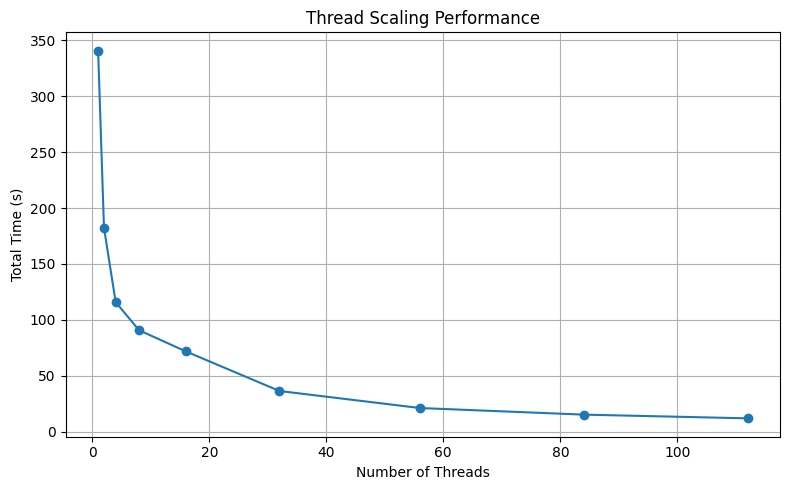

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import os

files = glob.glob(
    r"C:\Users\agnes\Desktop\magistrale\hpc\HPC_exam\output\output_multithread\thread_scaling_*_threads.csv"
)

#print("Files found:", files)

data = []

for f in files:
    filename = os.path.basename(f)

    match = re.search(r"thread_scaling_(\d+)_threads\.csv", filename)
    if match:
        threads = int(match.group(1))

        df = pd.read_csv(f)
        df.columns = df.columns.str.strip()

        total_time = df["Mean_total_time"].iloc[0]

        data.append((threads, total_time))

results = pd.DataFrame(data, columns=["Threads", "Total_time"])
results = results.sort_values("Threads")

print(results)

plt.figure(figsize=(8, 5))
plt.plot(results["Threads"], results["Total_time"], marker="o")
plt.xlabel("Number of Threads")
plt.ylabel("Total Time (s)")
plt.title("Thread Scaling Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

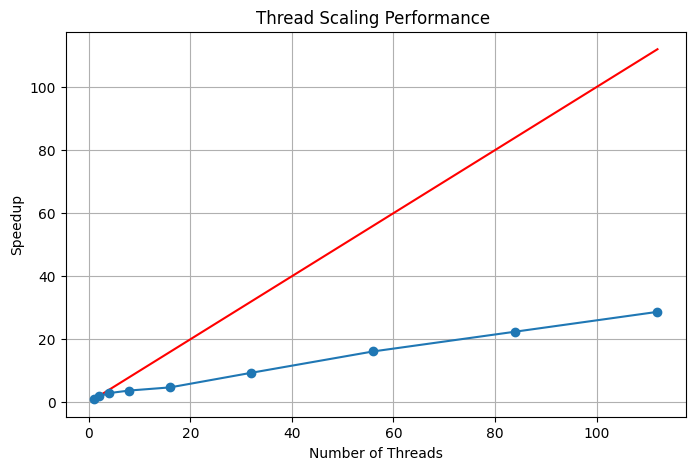

In [21]:
# plotting speedup
plt.figure(figsize=(8,5))
plt.plot(results["Threads"], results["Threads"], color = 'red')
# dividing serial time by parallel time to get speedup
plt.plot(results["Threads"], results["Total_time"].iloc[0]/results["Total_time"], marker="o")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Thread Scaling Performance ")
plt.grid(True)
plt.show()

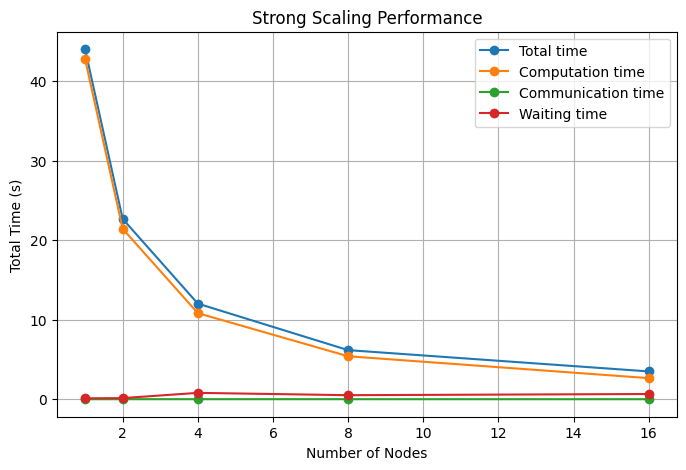

In [24]:
filess = glob.glob(r"C:\Users\agnes\Desktop\magistrale\hpc\HPC_exam\output\output_strong_scaling\strong_scaling_*n_*t.csv")

dataa = []

for f in filess:
    # Extract number of threads from filename using regex
    filename = os.path.basename(f)
    match = re.search(r"strong_scaling_(\d+)n_(\d+)t\.csv", filename)
    if match:
        nodes = int(match.group(1))
        tasks = int(match.group(2))
        df = pd.read_csv(f)

        total_time = df["Mean_total_time"].iloc[0]
        computation_time  = df["Mean_Computation_time"].iloc[0]
        communication_time  = df["Mean_Communication_time"].iloc[0]
        waiting_time = df["Mean_Waitall_time"].iloc[0]

        dataa.append((tasks, nodes, total_time, communication_time, computation_time, waiting_time))

# Convert to DataFrame
resultss = pd.DataFrame(dataa, columns=["Tasks", "Nodes", "Mean_total_time", 
                                      "Mean_Communication_time", "Mean_Computation_time", "Mean_Waitall_time"])
resultss.sort_values("Tasks", inplace=True)

# Plot
plt.figure(figsize=(8,5))
plt.plot(resultss["Nodes"], resultss["Mean_total_time"], marker="o", label="Total time")
plt.plot(resultss["Nodes"], resultss["Mean_Computation_time"], marker="o", label="Computation time")
plt.plot(resultss["Nodes"], resultss["Mean_Communication_time"], marker="o", label="Communication time")
plt.plot(resultss["Nodes"], resultss["Mean_Waitall_time"], marker="o", label="Waiting time")

# Labels and grid
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.title("Strong Scaling Performance")
plt.legend()
plt.grid(True)
plt.show()

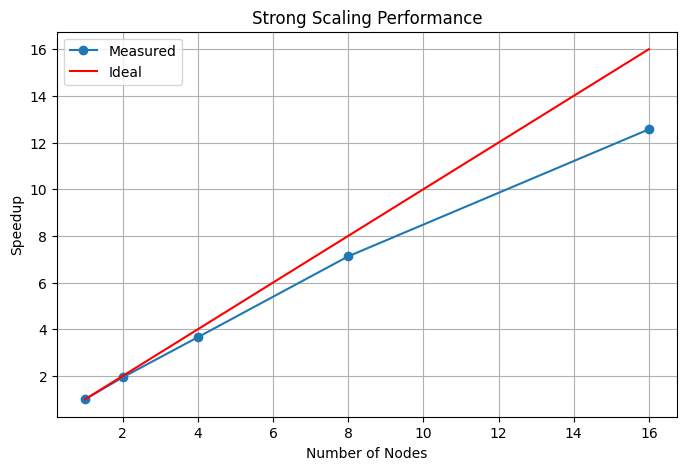

In [31]:
resultsss = resultss[["Tasks", "Nodes", "Mean_total_time"]].copy()
resultsss.sort_values("Tasks", inplace=True)

plt.figure(figsize=(8,5))
plt.plot(
	resultsss["Nodes"],
	resultsss["Mean_total_time"].iloc[0] / resultsss["Mean_total_time"],
	marker="o", label="Measured"
)
plt.plot(resultsss["Nodes"], resultsss["Nodes"], color='red', label='Ideal')
plt.xlabel("Number of Nodes")
plt.ylabel("Speedup")
plt.title("Strong Scaling Performance")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# need to test on Leonardo and implement the weak scaling 